In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA=pd.read_excel(r"C:\Users\retou\TRABAJO DE GRADO MIX\Tablas_de_Modelos_densidad_con_parS.xlsx",
                   sheet_name="Models_density_results")
DATA.head()

,MIX,Rho_exp,D_NRTL,D_RK,D_TR,D_VTPR
0,MIX_C1CH,0.78164,0.780930,0.781112,0.781930,0.780505
1,MIX_C1CH,0.77928,0.778838,0.778949,0.779465,0.778405
2,MIX_C1CH,0.77692,0.776716,0.776766,0.777008,0.776283
3,MIX_C1CH,0.77455,0.774541,0.774542,0.774559,0.774137
4,MIX_C1CH,0.77218,0.772336,0.772298,0.772118,0.771968


In [3]:
Temps=np.linspace(298.15,338.15,17)
Temps

array([298.15, 300.65, 303.15, 305.65, 308.15, 310.65, 313.15, 315.65,
       318.15, 320.65, 323.15, 325.65, 328.15, 330.65, 333.15, 335.65,
       338.15])

In [4]:
D_EXPS=DATA.groupby('MIX')['Rho_exp'].agg(list).reset_index()
D_EXPS

,MIX,Rho_exp
0,MIX_C1B,"[0.88129, 0.87863, 0.87596, 0.87329, 0.87062, ..."
1,MIX_C1CH,"[0.78164, 0.77928, 0.77692, 0.77455, 0.77218, ..."
2,MIX_C1O,"[0.7053745, 0.7033445, 0.7013100000000001, 0.6..."
3,MIX_C1T,"[0.8689, 0.86656, 0.86423, 0.8619, 0.85955, 0...."
4,MIX_C2B,"[0.8851899999999999, 0.8825335000000001, 0.879..."
5,MIX_C2CH,"[0.78571, 0.78335, 0.78099, 0.77862, 0.77626, ..."
6,MIX_C2O,"[0.70858, 0.7065465, 0.704511, 0.702472, 0.700..."
7,MIX_C2T,"[0.872193, 0.8698675, 0.8675375000000001, 0.86..."
8,MIX_C3B,"[0.88865, 0.886, 0.88334, 0.88068, 0.87802, 0...."
9,MIX_C3CH,"[0.78928, 0.78693, 0.78457, 0.78221, 0.77984, ..."


In [5]:
D_NRTL=DATA.groupby('MIX')['D_NRTL'].agg(list).reset_index()
D_RK=DATA.groupby('MIX')['D_RK'].agg(list).reset_index()
D_TR=DATA.groupby('MIX')['D_TR'].agg(list).reset_index()
D_VTPR=DATA.groupby('MIX')['D_VTPR'].agg(list).reset_index()

In [6]:
RES_NRTL=[np.array(D_EXPS.iloc[:,1][k])-np.array(D_NRTL.iloc[:,1][k]) for k in range(0,len(D_EXPS))]
RES_RK=[np.array(D_EXPS.iloc[:,1][k])-np.array(D_RK.iloc[:,1][k]) for k in range(0,len(D_EXPS))]
RES_TR=[np.array(D_EXPS.iloc[:,1][k])-np.array(D_TR.iloc[:,1][k]) for k in range(0,len(D_EXPS))]
RES_VTPR=[np.array(D_EXPS.iloc[:,1][k])-np.array(D_VTPR.iloc[:,1][k]) for k in range(0,len(D_EXPS))]
RES_DF=pd.DataFrame({"MIX":D_EXPS["MIX"].values,"RES_NRTL":RES_NRTL,"RES_RK":RES_RK,
             "RES_TR":RES_TR,"RES_VTPR":RES_VTPR})
RES_DF.head()

,MIX,RES_NRTL,RES_RK,RES_TR,RES_VTPR
0,MIX_C1B,"[0.00019828054031323372, 0.0001397300487462338...","[0.0005908687308119331, 0.0003745398300477598,...","[-0.0002513862918518406, -0.000156351308665536...","[0.005000155713974719, 0.0043604704742655764, ..."
1,MIX_C1CH,"[0.0007097114416082517, 0.0004415802815769254,...","[0.0005276775478030293, 0.0003311836320565309,...","[-0.0002898656824072976, -0.000185217148332306...","[0.001135159832618804, 0.0008748292467546381, ..."
2,MIX_C1O,"[3.5284752056274904e-05, 1.2099937531484528e-0...","[0.00019552011041112927, 0.0001076580539295379...","[-0.00022809308452331756, -0.00014326017608845...","[0.0043608917949169435, 0.0038518330336315687,..."
3,MIX_C1T,"[-2.002918712362689e-05, -9.023775612848617e-0...","[0.00034952581111435954, 0.0002115896814848250...","[-0.00020544546800549401, -0.00013701090673334...","[0.00314393172772498, 0.002583296019866732, 0...."
4,MIX_C2B,"[0.00023238434291017462, 0.0001564971081006172...","[0.0005962556357097526, 0.0003740189749027456,...","[-0.00024343134437265768, -0.00015527932610115...","[0.004361807360353631, 0.003715155045584395, 0..."
5,MIX_C2CH,"[0.00018491299118339466, 0.0001248780517668635...","[0.0005277438531864354, 0.0003298249274776843,...","[-0.00028866179219755317, -0.00018588767119920...","[0.001417413316286753, 0.001137909931824499, 0..."
6,MIX_C2O,"[2.7807231475551752e-05, 5.629547171537297e-06...","[0.00019773735542039095, 0.0001068542969866470...","[-0.00022633829557872076, -0.00014437577475123...","[0.0029159578365770544, 0.0024043676746843268,..."
7,MIX_C2T,"[7.994624557916552e-06, 1.5936410416861335e-05...","[0.00034782737008298703, 0.0002187425199265957...","[-0.00020594296653075883, -0.00012910308618363...","[0.0032719451341814976, 0.0027161412517268113,..."
8,MIX_C3B,"[0.00020886663709307474, 0.0001476272046772031...","[0.0006094009257539001, 0.00038703425529529323...","[-0.0002263764845343852, -0.000139787730188856...","[0.004811251886200352, 0.004154565982318004, 0..."
9,MIX_C3CH,"[0.00028460165302623963, 0.0001918858915420651...","[0.0005355773895212579, 0.0003410589698794597,...","[-0.00027907446315622586, -0.00017355342580827...","[0.0012970415623395626, 0.0010090365937550638,..."


In [7]:
New_df=pd.DataFrame()
#New_df["MIX"]=RES_DF.iloc[0:1,:].explode("RES_NRTL")["MIX"]
New_df["NRTL"]=RES_DF.iloc[0:1,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[0:1,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[0:1,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[0:1,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df.head()

,T,variable,value
0,298.15,NRTL,0.000198
1,300.65,NRTL,0.00014
2,303.15,NRTL,0.000071
3,305.65,NRTL,0.000003
4,308.15,NRTL,-0.000041
...,...,...,...
63,328.15,VTPR,-0.001527
64,330.65,VTPR,-0.00195
65,333.15,VTPR,-0.002368
66,335.65,VTPR,-0.002761


In [8]:
TITULOS=["Benceno-DBT (0.1620 m)","Ciclohexano-DBT (0.1503 m)","n-Octano-DBT (0.1108 m)","Tolueno-DBT (0.1373 m)",
"Benceno-DBT (0.2452 m)","Ciclohexano-DBT (0.2277 m)","n-Octano-DBT (0.1678 m)","Tolueno-DBT (0.2080 m)",
"Benceno-DBT (0.3284 m)","Ciclohexano-DBT (0.3044 m)","n-Octano-DBT (0.2247 m)","Tolueno-DBT (0.2785 m)"]

Guardar=["RESDensidad_B_DBT_C1.svg","RESDensidad_CH_DBT_C1.svg","RESDensidad_O_DBT_C1.svg","RESDensidad_T_DBT_C1.svg",
        "RESDensidad_B_DBT_C2.svg","RESDensidad_CH_DBT_C2.svg","RESDensidad_O_DBT_C2.svg","RESDensidad_T_DBT_C2.svg",
        "RESDensidad_B_DBT_C3.svg","RESDensidad_CH_DBT_C3.svg","RESDensidad_O_DBT_C3.svg","RESDensidad_T_DBT_C3.svg",]


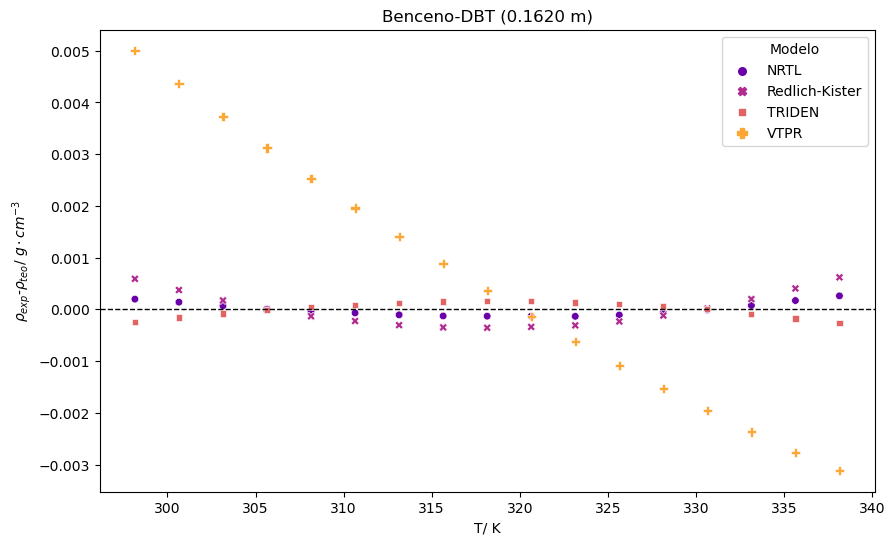

In [9]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[0])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[0])
plt.savefig(Guardar[0])
# Mostrar el gráfico
plt.show()

In [10]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[1:2,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[1:2,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[1:2,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[1:2,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df.head()

,T,variable,value
0,298.15,NRTL,0.00071
1,300.65,NRTL,0.000442
2,303.15,NRTL,0.000204
3,305.65,NRTL,0.000009
4,308.15,NRTL,-0.000156
...,...,...,...
63,328.15,VTPR,-0.0008
64,330.65,VTPR,-0.00084
65,333.15,VTPR,-0.000862
66,335.65,VTPR,-0.000865


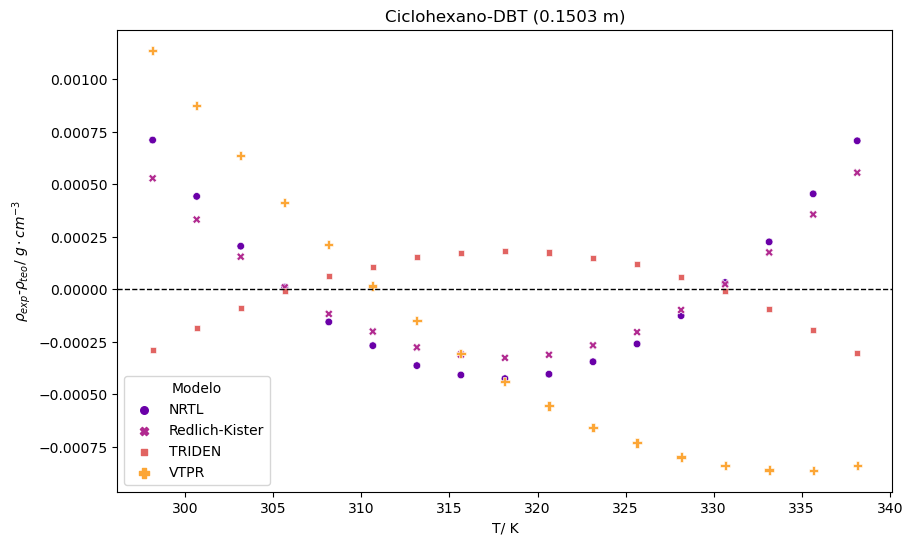

In [11]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[1])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[1])
plt.savefig(Guardar[1])
# Mostrar el gráfico
plt.show()

In [12]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[2:3,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[2:3,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[2:3,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[2:3,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000035
1,300.65,NRTL,0.000012
2,303.15,NRTL,-0.000002
3,305.65,NRTL,-0.000006
4,308.15,NRTL,-0.000016
...,...,...,...
63,328.15,VTPR,-0.00095
64,330.65,VTPR,-0.001311
65,333.15,VTPR,-0.001658
66,335.65,VTPR,-0.001994


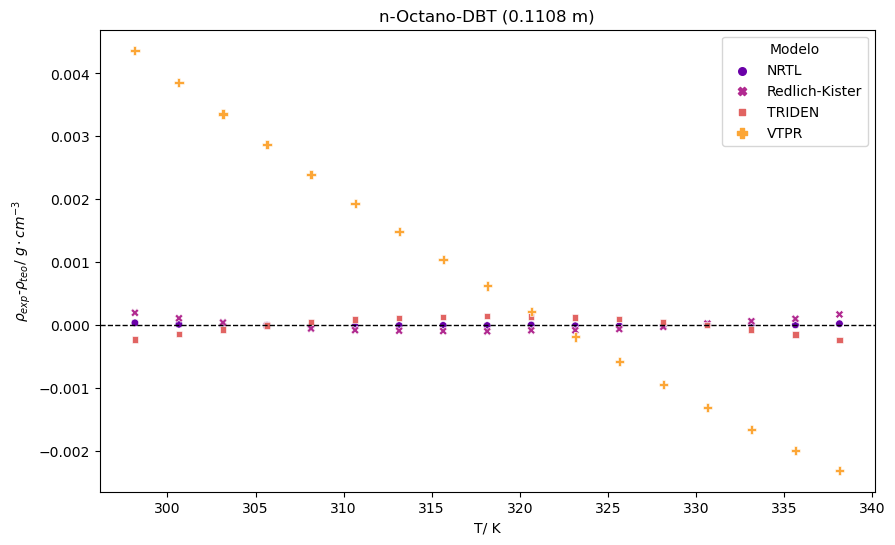

In [13]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[2])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[2])
plt.savefig(Guardar[2])
# Mostrar el gráfico
plt.show()

In [14]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[3:4,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[3:4,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[3:4,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[3:4,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df.head()

,T,variable,value
0,298.15,NRTL,-0.00002
1,300.65,NRTL,-0.000009
2,303.15,NRTL,0.000007
3,305.65,NRTL,0.000019
4,308.15,NRTL,0.000013
...,...,...,...
63,328.15,VTPR,-0.002547
64,330.65,VTPR,-0.002929
65,333.15,VTPR,-0.003301
66,335.65,VTPR,-0.003653


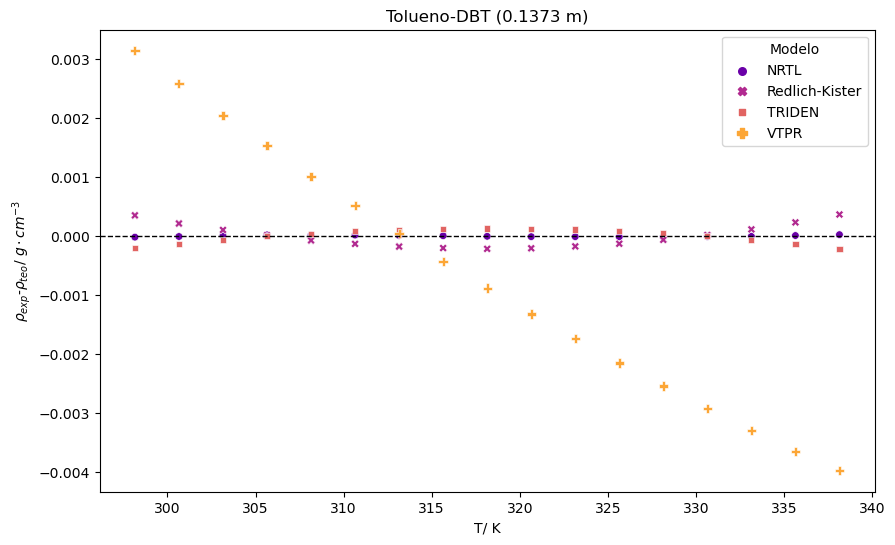

In [15]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[3])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[3])
plt.savefig(Guardar[3])
# Mostrar el gráfico
plt.show()

In [16]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[4:5,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[4:5,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[4:5,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[4:5,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df.head()

,T,variable,value
0,298.15,NRTL,0.000232
1,300.65,NRTL,0.000156
2,303.15,NRTL,0.00008
3,305.65,NRTL,0.000006
4,308.15,NRTL,-0.000046
...,...,...,...
63,328.15,VTPR,-0.002198
64,330.65,VTPR,-0.002629
65,333.15,VTPR,-0.003049
66,335.65,VTPR,-0.003447


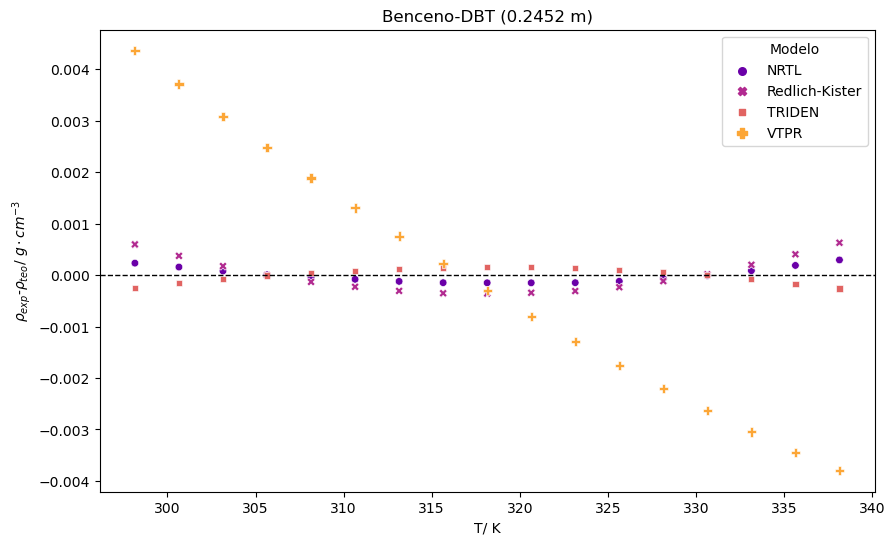

In [17]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[4])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[4])
plt.savefig(Guardar[4])
# Mostrar el gráfico
plt.show()

In [18]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[5:6,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[5:6,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[5:6,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[5:6,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df.head()

,T,variable,value
0,298.15,NRTL,0.000185
1,300.65,NRTL,0.000125
2,303.15,NRTL,0.000062
3,305.65,NRTL,0.00001
4,308.15,NRTL,-0.000033
...,...,...,...
63,328.15,VTPR,-0.000755
64,330.65,VTPR,-0.00082
65,333.15,VTPR,-0.000867
66,335.65,VTPR,-0.000896


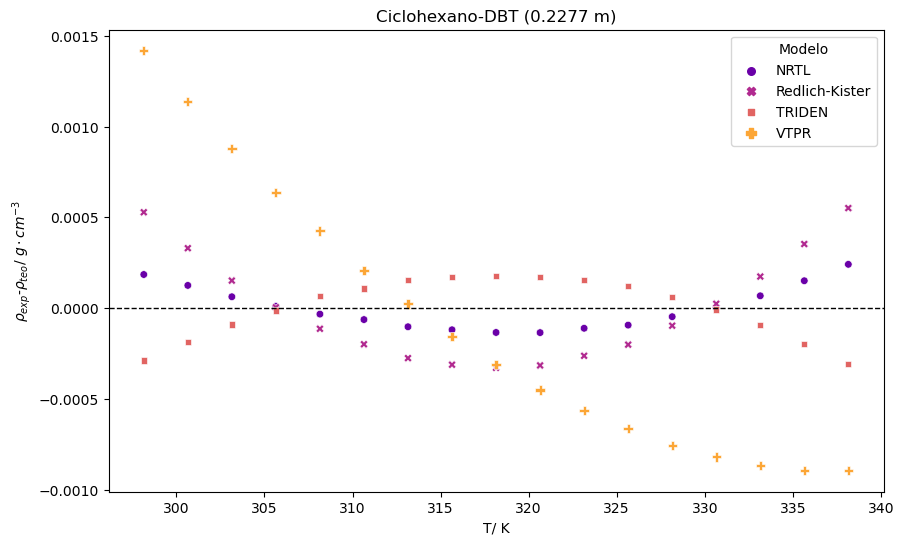

In [19]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[5])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[5])
plt.savefig(Guardar[5])
# Mostrar el gráfico
plt.show()

In [20]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[6:7,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[6:7,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[6:7,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[6:7,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000028
1,300.65,NRTL,0.000006
2,303.15,NRTL,-0.000005
3,305.65,NRTL,-0.000006
4,308.15,NRTL,-0.000016
...,...,...,...
63,328.15,VTPR,-0.002397
64,330.65,VTPR,-0.002769
65,333.15,VTPR,-0.003108
66,335.65,VTPR,-0.003445


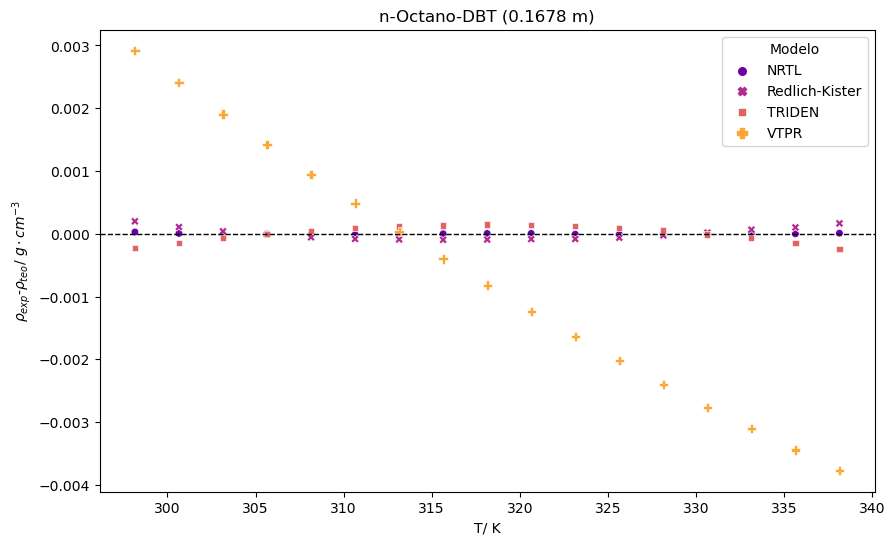

In [21]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[6])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[6])
plt.savefig(Guardar[6])
# Mostrar el gráfico
plt.show()

In [22]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[7:8,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[7:8,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[7:8,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[7:8,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000008
1,300.65,NRTL,0.000016
2,303.15,NRTL,0.000016
3,305.65,NRTL,0.000013
4,308.15,NRTL,0.000008
...,...,...,...
63,328.15,VTPR,-0.002483
64,330.65,VTPR,-0.002869
65,333.15,VTPR,-0.003242
66,335.65,VTPR,-0.0036


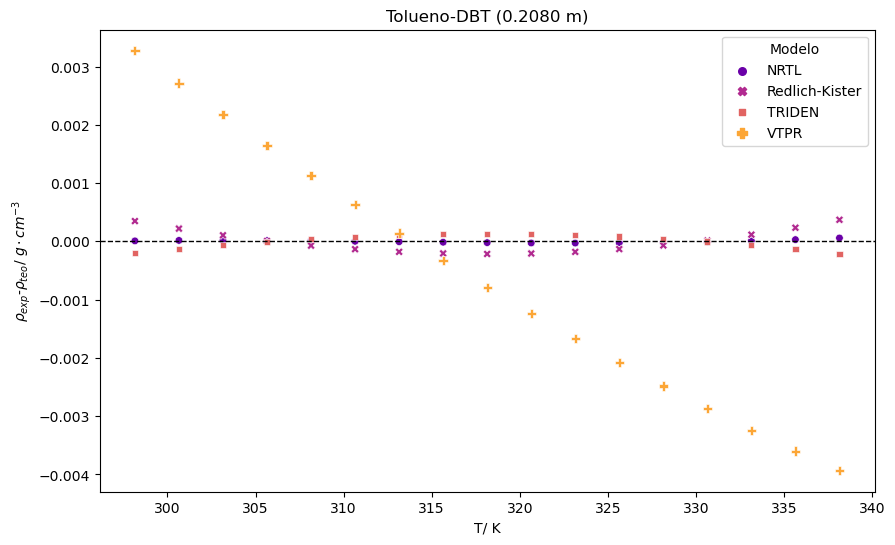

In [23]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[7])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[7])
plt.savefig(Guardar[7])
# Mostrar el gráfico
plt.show()

In [24]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[8:9,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[8:9,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[8:9,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[8:9,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000209
1,300.65,NRTL,0.000148
2,303.15,NRTL,0.000075
3,305.65,NRTL,0.000003
4,308.15,NRTL,-0.000045
...,...,...,...
63,328.15,VTPR,-0.0019
64,330.65,VTPR,-0.002337
65,333.15,VTPR,-0.00276
66,335.65,VTPR,-0.00317


In [25]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[9:10,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[9:10,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[9:10,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[9:10,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000285
1,300.65,NRTL,0.000192
2,303.15,NRTL,0.000093
3,305.65,NRTL,0.000019
4,308.15,NRTL,-0.00006
...,...,...,...
63,328.15,VTPR,-0.001054
64,330.65,VTPR,-0.001132
65,333.15,VTPR,-0.001193
66,335.65,VTPR,-0.001237


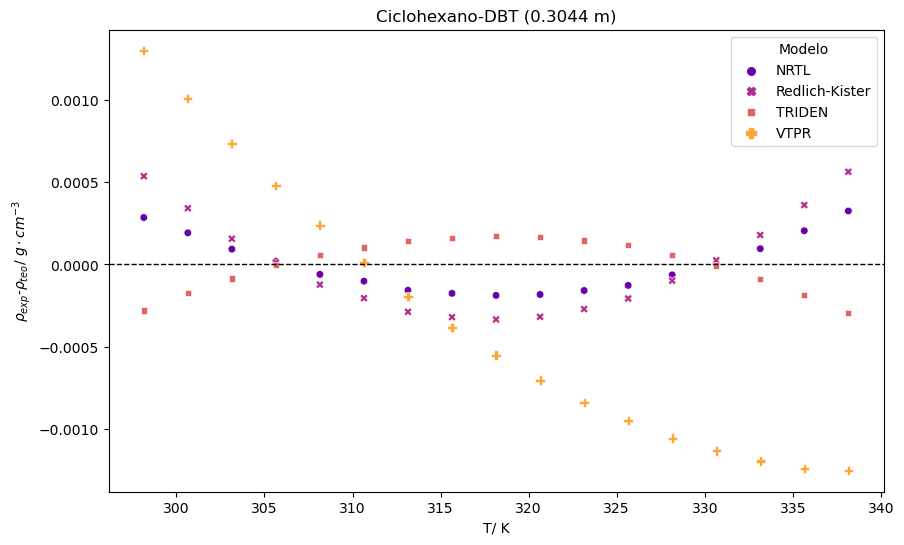

In [26]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[9])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[9])
plt.savefig(Guardar[9])
# Mostrar el gráfico
plt.show()

In [27]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[10:11,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[10:11,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[10:11,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[10:11,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,-0.000006
1,300.65,NRTL,-0.00001
2,303.15,NRTL,-0.000012
3,305.65,NRTL,-0.000006
4,308.15,NRTL,-0.000009
...,...,...,...
63,328.15,VTPR,-0.002795
64,330.65,VTPR,-0.003183
65,333.15,VTPR,-0.003572
66,335.65,VTPR,-0.003943


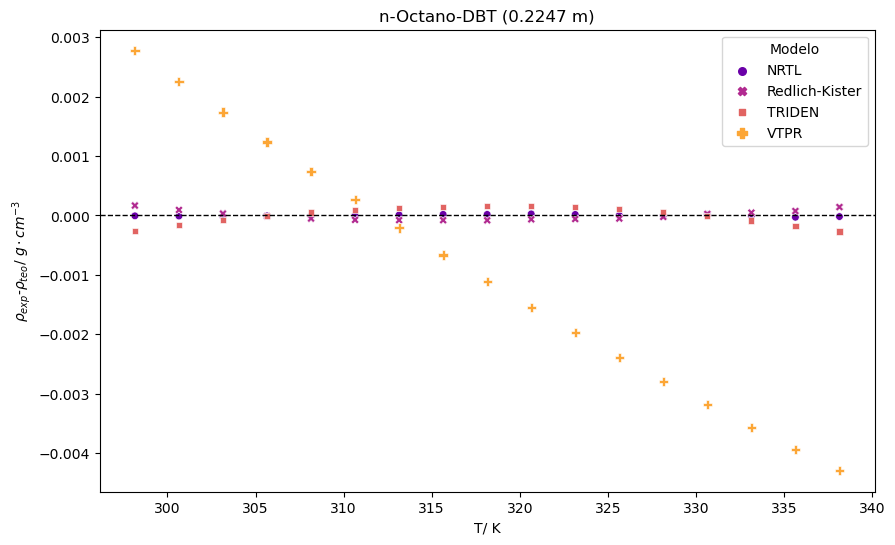

In [28]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[10])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[10])
plt.savefig(Guardar[10])
# Mostrar el gráfico
plt.show()

In [29]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[11:12,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[11:12,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[11:12,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[11:12,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,-0.000001
1,300.65,NRTL,0.000004
2,303.15,NRTL,0.000015
3,305.65,NRTL,0.000014
4,308.15,NRTL,0.000018
...,...,...,...
63,328.15,VTPR,-0.003711
64,330.65,VTPR,-0.004101
65,333.15,VTPR,-0.004472
66,335.65,VTPR,-0.004833


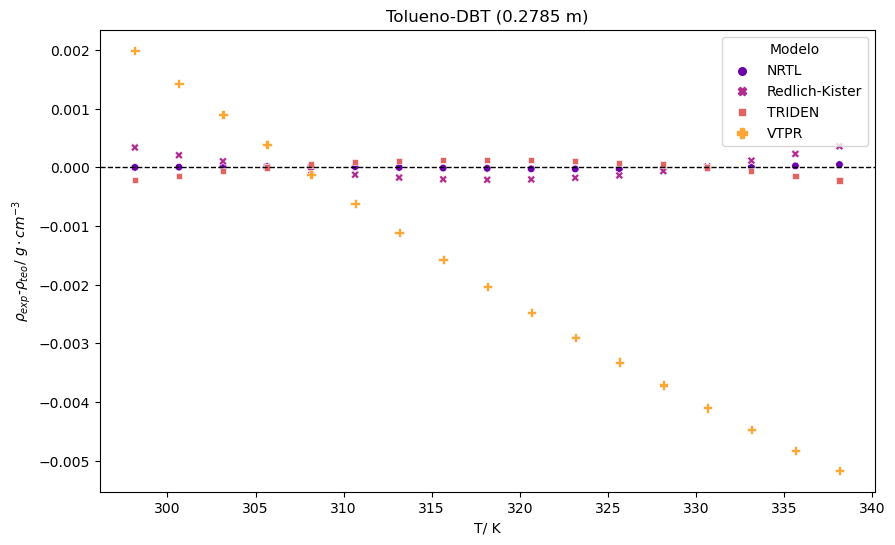

In [30]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[11])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[11])
plt.savefig(Guardar[11])
# Mostrar el gráfico
plt.show()